In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
iris=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [3]:
data=torch.tensor(iris[iris.columns[0:4]].values).float()
print(data[:5])
labels=torch.zeros(len(data),dtype=torch.long)
print(labels[:5])
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])
tensor([0, 0, 0, 0, 0])


In [4]:
def createANewModel():
    ANNiris=nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(ANNiris.parameters(),lr=.01)
    return ANNiris,lossfun,optimizer


In [5]:
numepochs=200
def trainTHeModel(trainProp):
    losses=torch.zeros(numepochs)
    trainAcc=[]
    testAcc=[]
    
    for epochi in range(numepochs):
        X_train,X_test,y_train,y_test=train_test_split(data,labels,train_size=trainProp)
        yHat=ANNiris(X_train)
        loss=lossfun(yHat,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item())
        a=ANNiris(X_test)
        testAcc.append(100*torch.mean((torch.argmax(a,axis=1)==y_test).float()).item())
    return trainAcc,testAcc


In [6]:
ANNiris,lossfun,optimizer=createANewModel()
trainAcc,testAcc=trainTHeModel(.8)

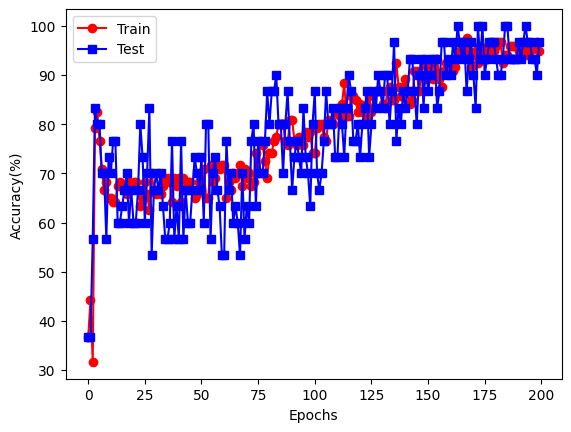

In [7]:
fig=plt.Figure(figsize=(10,5))
plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend(['Train','Test'])
plt.show()

In [8]:
trainSetSizes=np.linspace(0.2,0.95,10)
allTrainAcc=np.zeros((len(trainSetSizes),numepochs))
allTestAcc=np.zeros((len(trainSetSizes),numepochs))
for i in range(len(trainSetSizes)):
    ANNiris,lossfun,optimizer=createANewModel()
    trainAcc,testAcc=trainTHeModel(trainSetSizes[i])
    allTrainAcc[i,:]=trainAcc
    allTestAcc[i,:]=testAcc

<div style="color:purple">

# 🔹 Visualizing Accuracy as Heatmaps

This code creates two heatmaps:
- Left → Training accuracy
- Right → Test accuracy

---

## 🔹 1️⃣ Create Figure and Subplots

```python
fig, ax = plt.subplots(1, 2, figsize=(13,5))
plt.subplots(1,2)

Creates 1 row and 2 columns of plots.

fig → The entire figure object.

ax → Array of two axes (ax[0], ax[1]).

figsize=(13,5)

Width = 13 inches

Height = 5 inches

ax[0].imshow(allTrainAcc,
             aspect='auto',
             vmin=50,
             vmax=90,
             extent=[0,numepochs,
                     trainSetSizes[-1],
                     trainSetSizes[0]])
imshow(allTrainAcc)

Displays a matrix as an image (heatmap).

allTrainAcc shape:
aspect='auto'

Automatically adjusts plot scaling.

Prevents distortion.

vmin=50, vmax=90

Fixes color scale range.

50% accuracy → darkest color

90% accuracy → brightest color

Makes comparison consistent.

extent=[x_min, x_max, y_min, y_max]
extent = [0, numepochs,
          trainSetSizes[-1],
          trainSetSizes[0]]

This controls axis labels mapping.

X-axis: 0 → numepochs

Y-axis: training proportions

trainSetSizes[-1] → largest value (0.95)

trainSetSizes[0] → smallest value (0.2)

This flips the vertical axis so:

Smaller training size at top

Larger training size at bottom

fig.colorbar(p, ax=ax[1])
Adds color scale legend.

Linked to p (test accuracy heatmap).

Attached to right subplot.

Typically you’ll observe:

Small training sizes → unstable test accuracy

Larger training sizes → smoother, higher test accuracy

Training accuracy usually higher than test accuracy

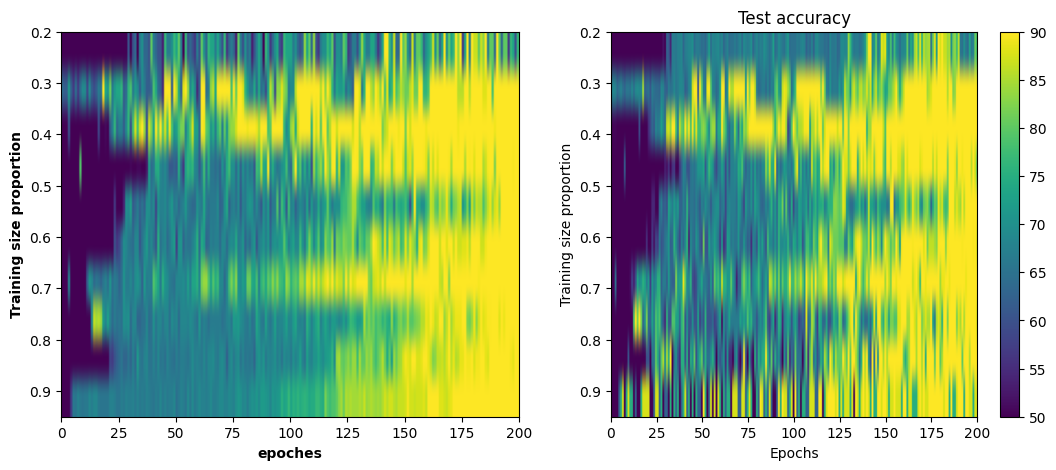

In [9]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(allTrainAcc,
             aspect='auto',
             vmin=50,
             vmax=90,
             extent=[0,
                     numepochs,
                     trainSetSizes[-1],
                     trainSetSizes[0]])

ax[0].set_xlabel("epoches", fontweight="bold")
ax[0].set_ylabel("Training size proportion", fontweight="bold")
p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()


# IRIS dataset using batch processing

In [10]:
from torch.utils.data import DataLoader

In [15]:
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,test_size=.2)
a=torch.Tensor(train_data)
b=torch.Tensor(train_labels)
c=torch.Tensor(test_data)
d=torch.Tensor(test_labels)
train_data=torch.utils.data.TensorDataset(a,b)
test_data=torch.utils.data.TensorDataset(c,d)
train_loader=DataLoader(train_data,batch_size=12,shuffle=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [12]:
for X,y in train_loader:
    print(X.shape,y.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


In [13]:
numofepoches=500
def trainTheModel():
    trainAcc=[]
    testAcc=[]
    for epochi in range(numofepoches):
        batchAcc=[]
        for X,y in train_loader:
            yHat=ANNiris(X)
            loss=lossfun(yHat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
        trainAcc.append(np.mean(batchAcc))
        X,y=next(iter(test_loader))
        e=ANNiris(X)
        testAcc.append(100*torch.mean((torch.argmax(e,axis=1)==y).float()).item())
    return trainAcc,testAcc

In [16]:
ANNiris,lossfun,optimizer=createANewModel()
trainAcc,testAcc=trainTheModel()

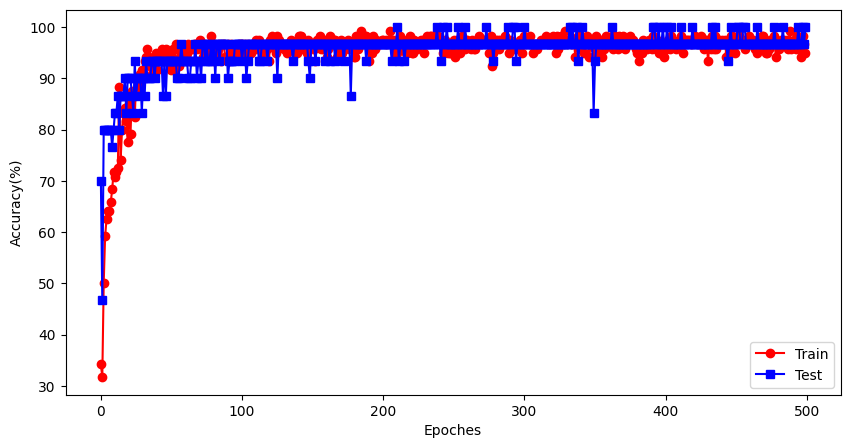

In [17]:
fig=plt.figure(figsize=(10,5))
plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epoches')
plt.ylabel('Accuracy(%)')
plt.legend(['Train','Test'])
plt.show()